In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# X_embedded = TSNE(n_components=2).fit_transform(X)
# X_embedded.shape

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/tarang/anaconda3/envs/argoverse/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:

def plotPCA(real_values, anomalous_values):
    pca = PCA(n_components=2)
    pca_result_real = pca.fit_transform(real_values)
    pca_result_anom = pca.fit_transform(anomalous_values)
    X = np.vstack([pca_result_real,pca_result_anom])
    Y = np.hstack([np.zeros((pca_result_real.shape[0])),np.ones((pca_result_anom.shape[0]))])

    X.shape, Y.shape

    # PCA

    plt.figure(figsize=(16,10))
    return sns.scatterplot(
        x=X[:,0], y=X[:,1], hue=Y,
        alpha=0.8
    )

In [5]:
# TSNE

In [13]:
def plotTSNE(real_values, anomalous_values):
    tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
    tsne_result_real = tsne.fit_transform(real_values)
    tsne_result_anom = tsne.fit_transform(anomalous_values)
    X2 = np.vstack([tsne_result_real,tsne_result_anom])
    Y2 = np.hstack([np.zeros((tsne_result_real.shape[0])),np.ones((tsne_result_anom.shape[0]))])
    plt.figure(figsize=(16,10))
    return sns.scatterplot(
        x=X2[:,0], y=X2[:,1], hue=Y2,
        alpha=0.8
    )

In [8]:
# load data here
real_values = np.load("../modelling/real_dev_embeddings.npy")
debris_anomalous_values = np.load("../modelling/anomalous_dev_embeddings.npy")
speed_lim_anomalous_values = np.load("../modelling/anomalous_tlsl_dev_embeddings2.npy")
speed_lim_anomalous_values2 = np.load("../modelling/anomalous_tlsl2_dev_embeddings.npy")

# Debris

<AxesSubplot:>

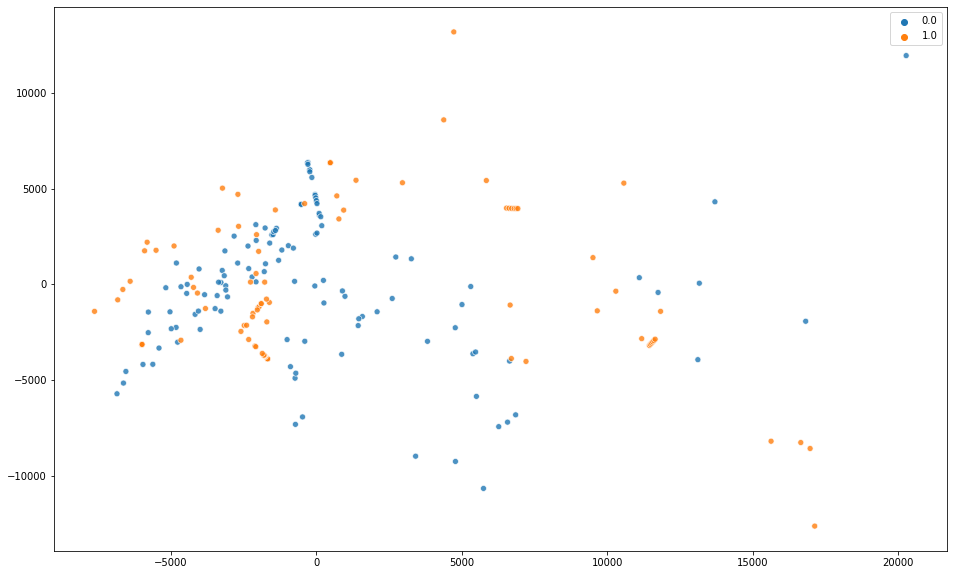

In [10]:
plotPCA(real_values,debris_anomalous_values)

[t-SNE] Computing 120 nearest neighbors...
[t-SNE] Indexed 121 samples in 0.002s...
[t-SNE] Computed neighbors for 121 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 121 / 121
[t-SNE] Mean sigma: 4857.925895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.310287
[t-SNE] KL divergence after 500 iterations: 0.116045
[t-SNE] Computing 127 nearest neighbors...
[t-SNE] Indexed 128 samples in 0.000s...
[t-SNE] Computed neighbors for 128 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 128 / 128
[t-SNE] Mean sigma: 3398.872754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.171215
[t-SNE] KL divergence after 500 iterations: 0.098644


<AxesSubplot:>

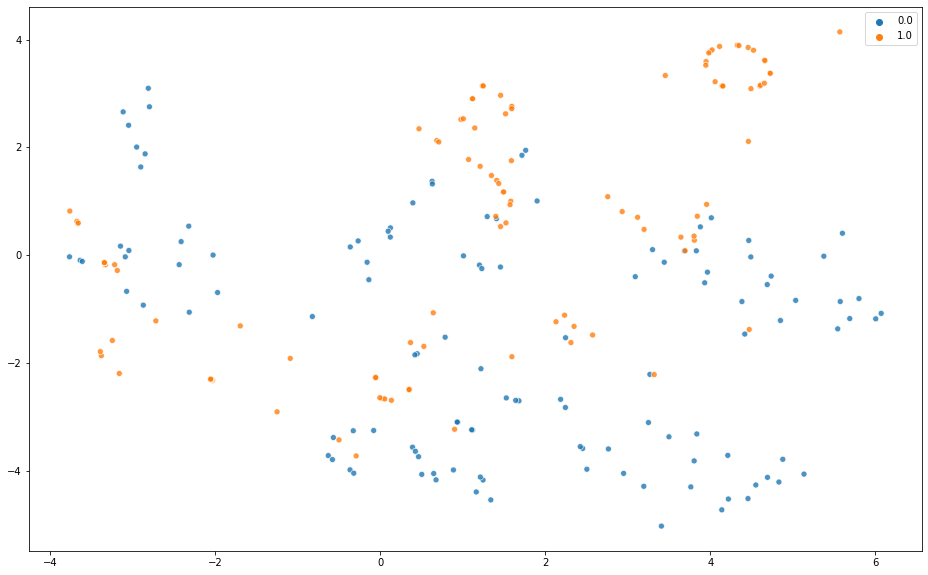

In [14]:
plotTSNE(real_values,debris_anomalous_values)

# Speed Limit and Traffic Light Anomalies

[t-SNE] Computing 120 nearest neighbors...
[t-SNE] Indexed 121 samples in 0.001s...
[t-SNE] Computed neighbors for 121 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 121 / 121
[t-SNE] Mean sigma: 4857.925895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.967937
[t-SNE] KL divergence after 500 iterations: 0.150972
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 301 samples in 0.000s...
[t-SNE] Computed neighbors for 301 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 301 / 301
[t-SNE] Mean sigma: 275.240520
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.648697
[t-SNE] KL divergence after 500 iterations: 0.192093


<AxesSubplot:>

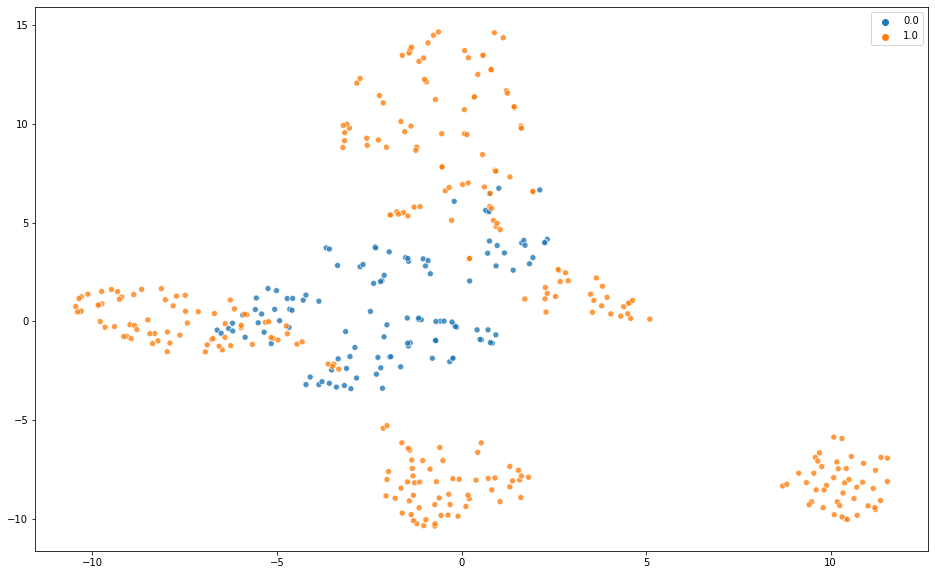

In [15]:
# No stopping on collisions
plotTSNE(real_values, speed_lim_anomalous_values)

In [ ]:
# Speed limit with stopping on collisions

[t-SNE] Computing 120 nearest neighbors...
[t-SNE] Indexed 121 samples in 0.002s...
[t-SNE] Computed neighbors for 121 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 121 / 121
[t-SNE] Mean sigma: 4857.925895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.809151
[t-SNE] KL divergence after 500 iterations: 0.109068
[t-SNE] Computing 128 nearest neighbors...
[t-SNE] Indexed 129 samples in 0.000s...
[t-SNE] Computed neighbors for 129 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 129 / 129
[t-SNE] Mean sigma: 1898.466684
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.111954
[t-SNE] KL divergence after 500 iterations: 0.171356


<AxesSubplot:>

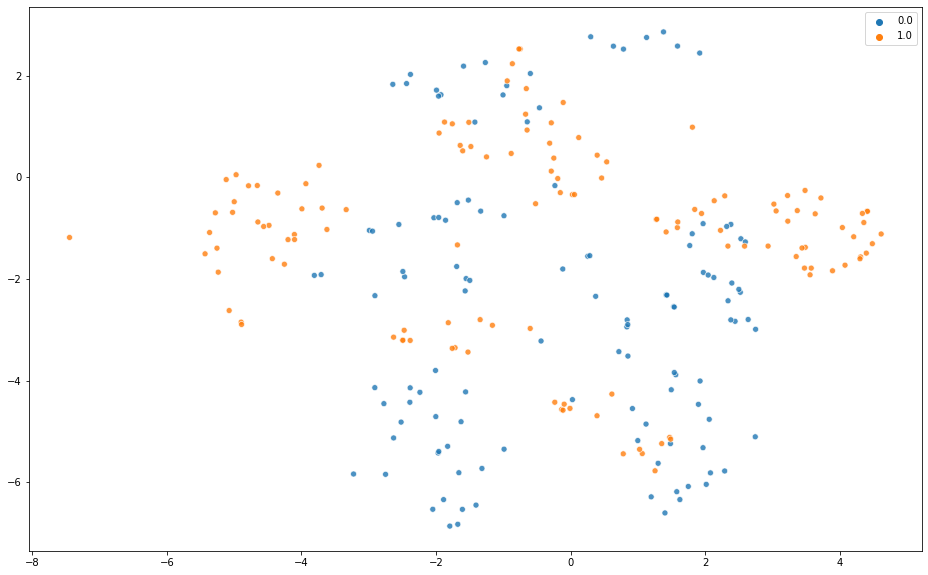

In [16]:
plotTSNE(real_values, speed_lim_anomalous_values2)

In [ ]:
# Pros: 
1. Can see some anomalous clusters(they are separate but still clustered nearby)
2. Not a high overlap in the real and anomalous data
# Cons:
1. Real data is quite sparse
2. Still need further fine grained labelling in the anomalous scenario segments - "ego driving straight", "ego waiting at traffic light", etc

Next steps
1. manually identify segments where the anomaly actually is occuring
2. additional classifier on the embeddings(MLP/other simple classifier)